In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib as plt
import matplotlib.pyplot as plt

In [ ]:
# normal question

In [ ]:
def doors_array():
    '''
    the function is desigend for initialize the door list
    And if the gift behind the door, we mark it as 1, otherwise, it is 0
    '''
    doors = [0,0,0]
    gift_i = random.randint(0,2)
    doors[gift_i] = 1
    return doors,gift_i

def win_loose(doors_array,change):
    '''
    the function is desigend for check if the guest win the game based on two stratgies

    change: the string the represented change a door or not
        change: switch to another unopend door
        unchange: stick in the initial choice

    Output:
        win_change_nums: if the guest win the game, we collect 1 point, otherwise, collect 0 point
        choose_i: the initial chooice
        gift_i: the door which hide the gift
        change_choose_i: final decision of the guest
        host_i: the door opened by the host
    '''
    #users choose a door
    choose_i = random.randint(0,2)
    doors = doors_array()[0]
    gift_i = doors_array()[1]
    # host open the door
    host_i = -1
    for i in range(len(doors)):
        if doors[i] != 1 and i != choose_i:
            host_i = i
            break
    # user1 -- unchange
    if change == 'unchange':
        win_unchange_nums = 0
        if doors[choose_i] == 1:
            win_unchange_nums +=1
        change_choose_i = choose_i
        return win_unchange_nums,choose_i,gift_i,change_choose_i,host_i

    if change == 'change':
        win_change_nums = 0
        for i in range(len(doors)):
            if i != host_i and i != choose_i:
                change_choose_i = i
        if doors[change_choose_i] == 1:
            win_change_nums+=1
        return win_change_nums,choose_i,gift_i,change_choose_i,host_i

In [ ]:
# get the results
def total_results(times,change_or_not,doors_array,win_loose):
    '''
    the function is designed for help us to run the model multiple times and collect results

    Args:
    times: how many times we play
    change_or_not: the string that represented change the door or not
    doors_array: the function that represented initilize the door list
    win_loose: the function that generate the result of each time

    Outputs:
    total_door: the list represented the three doors
    win_or_lose: the result of playing the game
    open_door: the user's initial choice
    gift_door: the door that hide the gift
    host_door: the door opened by the host
    final_open: the user's final decision
    prob_win: the probability of winning the game

    '''
    times_num = times

    # Behind Door
    total_door = []

    # if the car(1) behind the door, get 1 point; if the sheep(0) behind the door, get 0 point
    win_or_lose = []

    # initial choice of the door
    open_door = []

    # the gift behind this door
    gift_door = []

    # the door opened by the host
    host_door = []

    # final decision of the user
    final_open = []
    for i in range(times):
        total_door.append(doors_array()[0])
        doors_result = win_loose(doors_array,change_or_not)
        win_or_lose.append(doors_result[0])
        open_door.append(doors_result[1])
        gift_door.append(doors_result[2])
        final_open.append(doors_result[3])
        host_door.append(doors_result[4])

    #the probability of win the game (the car behind the door)
    prob_win = sum(win_or_lose)/times

    return total_door,win_or_lose,open_door,gift_door,host_door,final_open, prob_win

In [ ]:
#generate a table to visualize results
times = 100
total_unchange_result = total_results(times,'unchange',doors_array,win_loose)
unchange_result = pd.DataFrame({'Behind Door':total_unchange_result[0],
                        'Unchange: Initial Choice':total_unchange_result[2],
                        'Unchange: Host Choice':total_unchange_result[4],
                        'Unchange: Final Decision': total_unchange_result[5],
                        'Unchange: Gift': total_unchange_result[3],
                        'Unchange: Win or Lose':total_unchange_result[1]})
prob_win_unchange = total_unchange_result[-1]

total_change_result = total_results(times,'change',doors_array,win_loose)
change_result = pd.DataFrame({'Behind Door':total_change_result[0],
                        'Change: Initial Choice':total_change_result[2],
                        'Change: Host Choice':total_change_result[4],
                        'Change: Final Decision': total_change_result[5],
                        'Change: Gift': total_change_result[3],
                        'Change: Win or Lose':total_change_result[1]})
prob_win_change = total_change_result[-1]

Text(0, 0.5, 'Score')

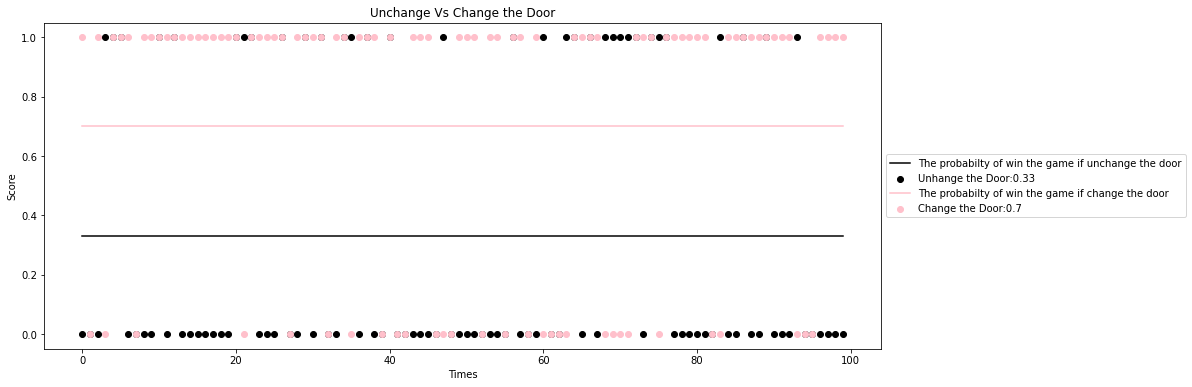

In [ ]:
# plot the results for one sub sample
plt.figure(figsize=(15,6))
plt.plot([prob_win_unchange]*times,color = 'black',label = 'The probabilty of win the game if unchange the door')
plt.scatter(range(times),unchange_result['Unchange: Win or Lose'],color = 'black',label = 'Unhange the Door:{}'.format(prob_win_unchange))
plt.plot([prob_win_change]*times,color = 'pink',label = 'The probabilty of win the game if change the door')
plt.scatter(range(times),change_result['Change: Win or Lose'],color = 'pink',label = 'Change the Door:{}'.format(prob_win_change))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Unchange Vs Change the Door')
plt.xlabel('Times')
plt.ylabel('Score')

In [ ]:
unchange_result

,Behind Door,Unchange: Initial Choice,Unchange: Host Choice,Unchange: Final Decision,Unchange: Gift,Unchange: Win or Lose
0,"[0, 1, 0]",0,1,0,0,0
1,"[0, 0, 1]",2,0,2,2,0
2,"[0, 1, 0]",1,2,1,0,0
3,"[0, 1, 0]",0,1,0,0,1
4,"[1, 0, 0]",2,0,2,1,1
...,...,...,...,...,...,...
95,"[1, 0, 0]",2,0,2,2,0
96,"[0, 1, 0]",0,1,0,0,0
97,"[1, 0, 0]",1,2,1,2,0
98,"[1, 0, 0]",0,2,0,0,0


In [ ]:
change_result

,Behind Door,Change: Initial Choice,Change: Host Choice,Change: Final Decision,Change: Gift,Change: Win or Lose
0,"[0, 1, 0]",0,1,2,1,1
1,"[1, 0, 0]",0,1,2,0,0
2,"[0, 0, 1]",2,0,1,2,1
3,"[0, 0, 1]",1,0,2,1,0
4,"[0, 1, 0]",0,1,2,2,1
...,...,...,...,...,...,...
95,"[0, 0, 1]",2,0,1,1,0
96,"[0, 1, 0]",2,0,1,0,1
97,"[0, 0, 1]",0,2,1,1,1
98,"[1, 0, 0]",1,2,0,2,1


In [ ]:
# statisical analysis

In [ ]:
def average_win(total_results,times,change_or_not,doors_array,win_loose):
    '''
    the function is help us to calculate the average probability of winning the gift

    output:
    result: the list represented the probability of winning the game of each sub sample
    avg_prob: the average probability of winning the game
    '''
    result = []
    for i in range(times):
        total_result = total_results(times,change_or_not,doors_array,win_loose)
        result.append(total_result[-1])
    avg_prob = round(sum(result)/len(result),4)
    return result, avg_prob

In [ ]:
times = 1000
unchange_result = average_win(total_results,times,'unchange',doors_array,win_loose)[0]
unchange_avg_prob = average_win(total_results,times,'unchange',doors_array,win_loose)[1]
change_result = average_win(total_results,times,'change',doors_array,win_loose)[0]
change_avg_prob = average_win(total_results,times,'change',doors_array,win_loose)[1]

(0.0, 1.0)

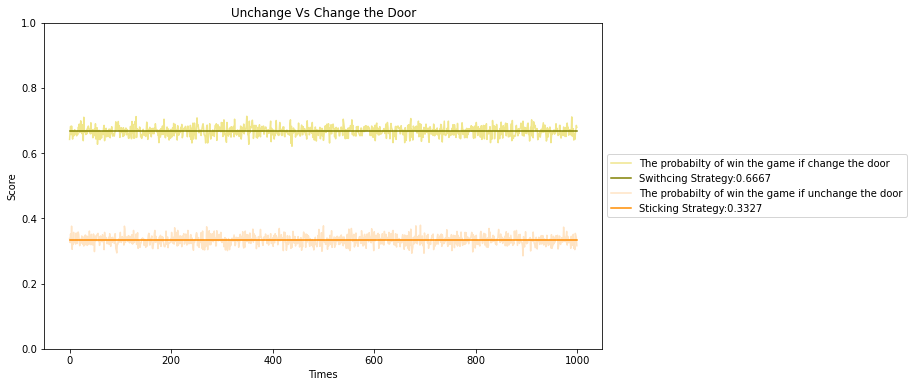

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(change_result,color = 'khaki',label = 'The probabilty of win the game if change the door')
plt.plot([change_avg_prob]*times,color = 'olive',label = 'Swithcing Strategy:{}'.format(change_avg_prob))
plt.plot(unchange_result,color = 'bisque',label = 'The probabilty of win the game if unchange the door')
plt.plot([unchange_avg_prob]*times,color = 'darkorange',label = 'Sticking Strategy:{}'.format(unchange_avg_prob))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Unchange Vs Change the Door')
plt.xlabel('Times')
plt.ylabel('Score')
plt.ylim(0, 1)